<a href="https://colab.research.google.com/github/ua-deti-information-retrieval/Neural-IR-hands-on/blob/main/RI_practical_tutorial_1_Torch_background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RI practical tutorial #1

## Background (auto diff)

TODO explain that we are using torch and why

## Dependencies

In [1]:
!pip install torch matplotlib

## Quick torch backgroud

### Intro

PyTorch is an open-source deep learning library developed by Facebook's AI Research lab. It's widely recognized for its flexibility and ease-of-use, particularly in research and development settings.

Although it has being popularized as a deep learning library, it main functionality is an efficient mathematical library with optimized auto differentiation capability that can run on acceleartors, namely GPUs.

At its core, like other deep learning libraries, PyTorch manages mathematical computations through a computational graph. This graph is highly optimized and executed using efficient languages like C++. From the user's perspective, interaction with PyTorch is predominantly through a Python interface, ensuring accessibility and ease of use.

Additionaly resources:
- https://pytorch.org/tutorials/beginner/basics/intro.html
- https://www.dataquest.io/blog/pytorch-for-beginners/

### Tensors

As a mathematical library, torch uses "tensors" as the key data structure to represent any numerical value. Tensors can have any arbritary shape allowing us to represent scalars, vectors, matrices and multidimentional matrices.

These tensors are quite akin to NumPy's ndarrays. However, a significant distinction is their ability to operate on GPUs or other hardware accelerators. Interestingly, tensors and NumPy arrays can often share the same memory, which helps in avoiding redundant data copying. Another noteworthy feature of tensors is their optimization for automatic differentiation

In [98]:
import torch

In [7]:
# creating several exemples of tensors
scalar_value = torch.tensor(1)
vector = torch.tensor([0,1,2])
matrix = torch.tensor([[0,1,2],[3,4,5]])
nmatrix = torch.tensor([[[0,1,2],[3,4,5]],[[6,7,8],[9,10,11]]])

print(f"{scalar_value=}")
print(f"{vector=}")
print(f"{matrix=}")
print(f"{nmatrix=}")

scalar_value=tensor(1)
vector=tensor([0, 1, 2])
matrix=tensor([[0, 1, 2],
        [3, 4, 5]])
nmatrix=tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])


In [8]:
#checking some properties of the tensors

print("nmatrix shape:", nmatrix.shape)
print("vector dtypr:", vector.dtype)
print("matrix device:", matrix.device)

# method over tensors
vector = vector.type(torch.float32)
print(vector, vector.dtype)
print("vector mean:", vector.mean())
print("vector mean:", vector.sum())

nmatrix shape: torch.Size([2, 2, 3])
vector dtypr: torch.int64
matrix device: cpu
tensor([0., 1., 2.]) torch.float32
vector mean: tensor(1.)
vector mean: tensor(3.)


### Operations

Torch supports most of the alberic operations, like product, sum, inner product (dot product), transpose etc.


In [ ]:
# sums [0, 1, 2] with [1, 1, 1]
print(vector + torch.ones((3,))) # + is overload as torch.add

# dot of (2,3) with (3,) -> (2,)
print(matrix @ vector) # @ is overload as torch.matmul

# when scalar ops with vector or matrix, torch automaticly broadcasts the scalar to the same shape
print(2 * vector) # * is overload as torch.mul

tensor([1., 2., 3.])
tensor([ 5, 14])
tensor([0, 2, 4])


### Automatic Differentiation (Auto-Diff):

PyTorch provides an automatic differentiation system called Autograd. This feature allows for the automatic computation of gradients, which is essential for training neural networks. By keeping track of operations performed on tensors, Autograd can automatically compute the derivatives (gradients) needed for optimization.

Lets put everything together and write function that minimizes any arbritary polynominal.

As an example consider $f(x) = x^4-3x^2-x+4$

In [99]:
def polynominal(x):
  return x**4 - 3*x**2 - x + 4



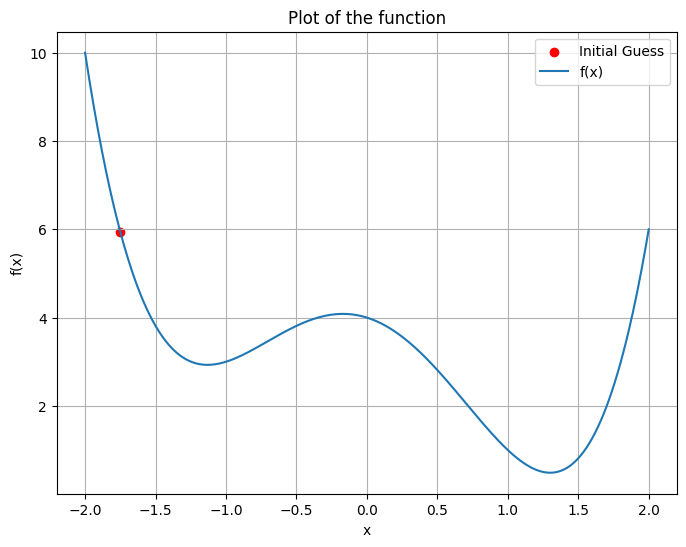

In [171]:
import matplotlib.pyplot as plt

# plot
def plot_function(func, point=None):
  x = torch.linspace(-2, 2, 400, dtype=torch.float32)

  # in torch we can also do y=func(x)
  #y=func(x)

  y = [func(x_i) for x_i in x]

  plt.figure(figsize=(8, 6))

  if point is not None:
    x_initial_guess = point
    y_initial_guess = func(x_initial_guess)
    with torch.no_grad():
      plt.scatter(x_initial_guess, y_initial_guess, color='red', label='Initial Guess')  # Plot the initial guess as a red dot

  with torch.no_grad():
    plt.plot(x, y, label='f(x)')


  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Plot of the function')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_function(polynominal, -1.75)


#### How to compute derivatives?

**Compute Derivative at a Point Using Difference Quotient**: The difference quotient method is typically used to find the derivative of a function at a specific point. The formula is:

$f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$

**Differentiation of f(x)**:

Differentiation involves applying various rules to find the derivative of the entire function.

$f'(x) = 4x^3-6x-1$

In [172]:
def d_polynominal_dq(x):
  h = 1e-3
  return (polynominal(x+h)-polynominal(x))/h

d_polynominal_dq(-1.75)

-11.922131998998609

In [173]:
def d_polynominal(x):
  return 4*x**3 - 6*x -1

d_polynominal(-1.75)

-11.9375

In [174]:
def d_autograd(x, f):
  x = torch.tensor(x, requires_grad=True)

  y = f(x)
  y.backward()
  return x.grad

d_autograd(-1.75, polynominal)

tensor(-11.9375)

In [185]:
def grad(func):
  """
  Function decorator that returns the derivative function of func
  """
  def autograd(x):
    if not isinstance(x, torch.Tensor):
      x = torch.tensor(x, requires_grad=True)
    elif not x.requires_grad:
      x.requires_grad = True

    output = func(x)

    derivative = torch.autograd.grad(output, x, create_graph=True)[0]

    return derivative
  return autograd

d_grad_f_polynominal = grad(polynominal)
d_grad_f_polynominal(-1.75)

tensor(-11.9375, grad_fn=<AddBackward0>)

#### Why this is usefull?

Because its a general algorithm that can differentiate any function, does not matter the complexity and the number of variables

$f(x) = \cos(x^2) \cdot e^{-x} + \tanh(x) \cdot (3x^3 - x) + \frac{1}{1 + e^{-2x}}$


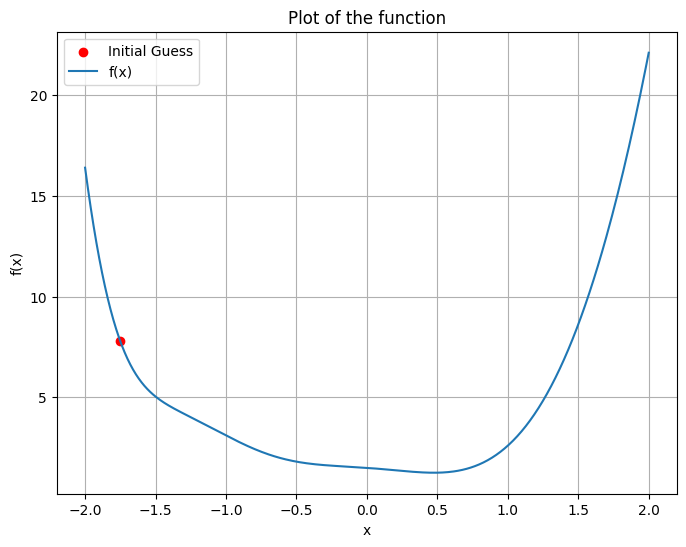

In [186]:

def f(x):
  return torch.cos(x**2) * torch.exp(-x) + torch.tanh(x) * (3*x**3 - x) + 1 / (1 + torch.exp(-2*x))

plot_function(f, torch.tensor(-1.75))

In [199]:
d_f = grad(f)

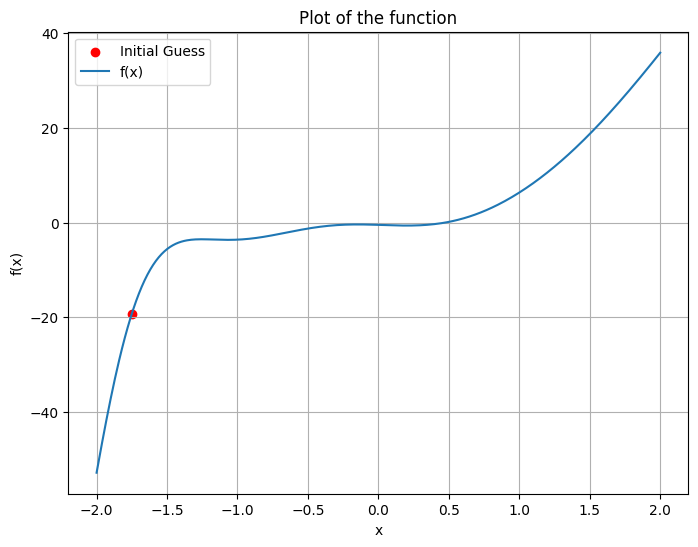

In [200]:
plot_function(d_f, -1.75)

#### Using AutoGrad to give us the derivative



In [ ]:
def minimize_polynominal(poly_func, initial_point, lr=0.01, iterations=50):

  x = torch.tensor(initial_point, requires_grad=True)
  list_of_x_and_grads = []
  for i in range(iterations):

    y = polynominal(x)
    y.backward() # torch call that triggers the computation of gradients to all of the registed variables, which in this case is only "x"

    # its important to use no_grad context manager to tell pytorch that we do not want to track this operation in the autodiff graph
    with torch.no_grad():
      list_of_x_and_grads.append((x.item(), x.grad.item()))
      x -= x.grad * lr
      x.grad.zero_()
  return x, list_of_x_and_grads


In [ ]:
def make_visualization(poly_func, initial_point, lr=0.01, iterations=50, show_grad_lines=False):
  # plot
  x_f = torch.linspace(-2, 2, 400)
  y_f = poly_func(x_f)

  plt.figure(figsize=(8, 6))
  plt.plot(x_f, y_f, label='f(x) = x^4-3x^2+4')

  final_value, list_of_x_and_grad = minimize_polynominal(poly_func, initial_point, lr, iterations)

  for x, grad in list_of_x_and_grad:

    y = poly_func(x)

    plt.scatter(x, y, color='red')  # Plot the initial guess as a red dot

    if show_grad_lines:
      # add as well the gradient
      tangent_x = torch.linspace(x - 0.1, x + 0.1, 10) # interval of x-values for the tangent line
      tangent_y = grad * (tangent_x - x) + y
      plt.plot(tangent_x, tangent_y, color='green')  # Tangent line


  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Plot of the function')
  plt.legend()
  plt.grid(True)
  plt.show()

  return final_value



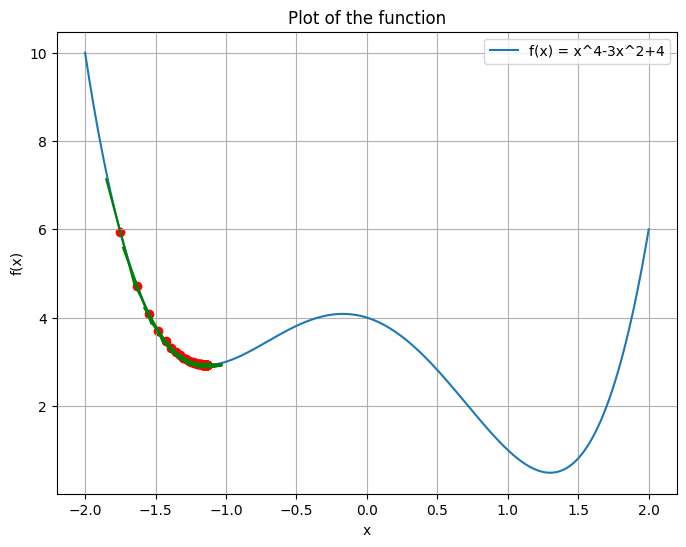

tensor(-1.1331, requires_grad=True)

In [ ]:
make_visualization(polynominal, -1.75, show_grad_lines=True)

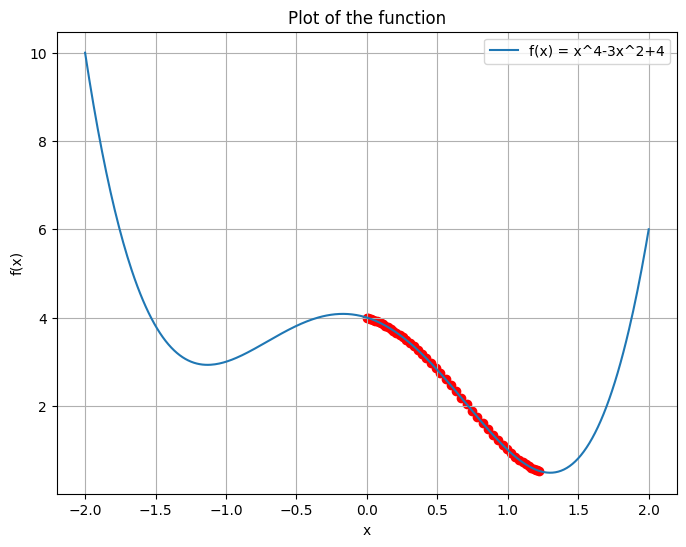

tensor(1.2326, requires_grad=True)

In [ ]:
make_visualization(polynominal, 0.)

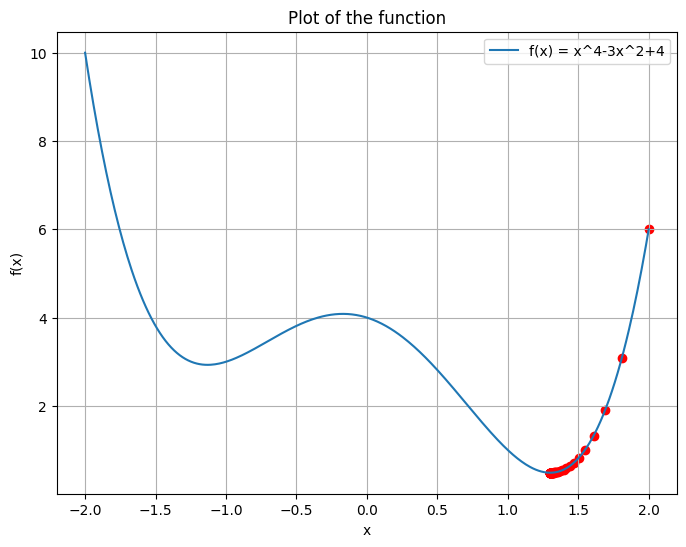

tensor(1.3010, requires_grad=True)

In [ ]:
make_visualization(polynominal, 2.)

### How to run on accelerators?

One of the main advantages of PyTorch is the ability to perform operations on specialized devices known as accelerators, specifically GPUs. These specialized devices are capable of processing large amounts of data in parallel, which greatly enhances the efficiency of the algorithms required in deep learning.

In PyTorch, each tensor is associated with a device attribute. This attribute specifies where the tensor is physically allocated. Therefore, to execute computations on accelerators, we simply need to ensure that our tensors are allocated on the GPU device.

By default any created tensor (unless special specified cases) will be allocated to "CPU". To switch to gpu just run ".to("cuda")"

In [ ]:
vector = torch.rand((2,2))
print(vector.device)

cpu


In [ ]:
vector = vector.to("cuda")
print(vector.device)

cuda:0


In [ ]:
big_matrix = torch.rand((10000,1000))
big_matrix_gpu = big_matrix.to("cuda")

In [ ]:
%time big_matrix @ big_matrix.T

CPU times: user 1.65 s, sys: 185 ms, total: 1.84 s
Wall time: 1.86 s


tensor([[320.9144, 253.1009, 247.5081,  ..., 254.9375, 240.4921, 243.2260],
        [253.1009, 340.2853, 256.3163,  ..., 257.9080, 245.1212, 254.4930],
        [247.5081, 256.3163, 336.0763,  ..., 260.5623, 244.3720, 251.2545],
        ...,
        [254.9375, 257.9080, 260.5623,  ..., 346.0400, 247.9159, 259.1376],
        [240.4921, 245.1212, 244.3720,  ..., 247.9159, 318.2231, 248.7930],
        [243.2260, 254.4930, 251.2545,  ..., 259.1376, 248.7930, 332.6855]])

In [ ]:
%time big_matrix_gpu @ big_matrix_gpu.T

CPU times: user 1.08 ms, sys: 1.03 ms, total: 2.1 ms
Wall time: 2.11 ms


tensor([[320.9145, 253.1010, 247.5081,  ..., 254.9375, 240.4920, 243.2260],
        [253.1010, 340.2854, 256.3162,  ..., 257.9082, 245.1211, 254.4931],
        [247.5081, 256.3162, 336.0762,  ..., 260.5625, 244.3721, 251.2546],
        ...,
        [254.9375, 257.9082, 260.5625,  ..., 346.0395, 247.9159, 259.1376],
        [240.4920, 245.1211, 244.3721,  ..., 247.9159, 318.2231, 248.7929],
        [243.2260, 254.4931, 251.2546,  ..., 259.1376, 248.7929, 332.6854]],
       device='cuda:0')

### How to create and train models in torch?

PyTorch provides a comprehensive package for creating and training neural networks, primarily found under the torch.nn.

Crucially, the torch.nn.Module class is the core class from which all neural network models should inherit when you're implementing your own models.

Below is an example of a simple perceptron model:



In [ ]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# which is equivalent to:
input_dim = 10
w = torch.randn(input_dim, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

def percetron(x):
  return torch.matmul(x, w)+b
